In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Turning off the warnings
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import plotly.express as px

In [125]:
data = pd.read_csv('fifa21_male2.csv')
print(data.head())

   ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     CDM    RDM    RWB     LB   LCB    CB   RCB     RB    GK Gender 

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [126]:
# choose only the columns I want

data = data[['Name', 'Age', 'Nationality', 'OVA', 'Wage', 'Value', 'foot', 'BOV', 'Weight', 'Position']]
print(data.head())

          Name  Age            Nationality  OVA  Wage  Value   foot  BOV  \
0  G. Pasquale   33                  Italy   69   €7K  €625K   Left   71   
1  Luis García   37                  Spain   71   €7K  €600K  Right   70   
2      J. Cole   33                England   71  €15K  €1.1M  Right   71   
3     D. Yorke   36  Trinidad &amp; Tobago   68    €0     €0  Right   70   
4      Iniesta   36                  Spain   81  €12K  €5.5M  Right   82   

   Weight      Position  
0  181lbs            LM  
1  143lbs    CM CAM CDM  
2  161lbs  CAM RM RW LM  
3  165lbs           NaN  
4  150lbs        CM CAM  


In [145]:
# identify the column types 

data.dtypes


Name           object
Age             int64
Nationality    object
OVA             int64
Wage           object
Value          object
foot           object
BOV             int64
Weight          int64
Position       object
dtype: object

In [159]:
# clean the Weight column, remove the lbs so it can be worked as an integer

#data.Weight=data.Weight.str.replace('[lbs]','') 
data.Weight

# remove the missing values

data.dropna(inplace = True)
#print(data['Weight']).head

#change type to integer
data['Weight'] = data['Weight'].astype(int)

data.dtypes


Name           object
Age             int64
Nationality    object
OVA             int64
Wage           object
Value          object
foot           object
BOV             int64
Weight          int64
Position       object
dtype: object

165.49473432264242


<AxesSubplot:>

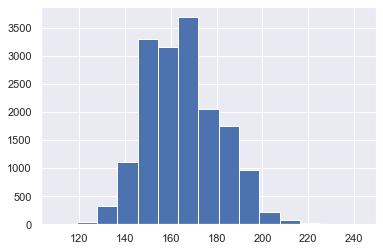

In [155]:
# find the mean in weight

weight_mean = data['Weight'].mean()
print(weight_mean)

#create histogram

sns.set()
data['Weight'].hist(bins = 15)

In [165]:
data.isna
data


# drop null value columns to avoid errors

data.dropna(inplace = True)
data

,Name,Age,Nationality,OVA,Wage,Value,foot,BOV,Weight,Position
0,G. Pasquale,33,Italy,69,7K,€625K,Left,71,181,LM
1,Luis García,37,Spain,71,7K,€600K,Right,70,143,CM CAM CDM
2,J. Cole,33,England,71,15K,€1.1M,Right,71,161,CAM RM RW LM
4,Iniesta,36,Spain,81,12K,€5.5M,Right,82,150,CM CAM
5,D. Odonkor,27,Germany,66,5K,€725K,Right,66,163,RW RM
...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,France,64,2K,€550K,Right,66,165,CB
17121,W. Rickard,18,Wales,56,3K,€130K,Right,58,170,CAM CM
17122,C. Barrett,18,England,56,2K,€130K,Right,56,154,RB
17123,J. Gazibegović,20,Bosnia Herzegovina,62,3K,€475K,Right,62,148,RB LB


In [259]:
# Clean column Value by removing currency and transform to float


def format_money(column):
    
    values = []
    for value in data[column]:
        if type(value) == float or type(value) == int:
            return value
        if value[-1]=='M':
            money = 1000000
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money)
    return values

data.dtypes

Name             object
Age               int64
Nationality      object
OVA               int64
Wage             object
Value           float64
foot             object
BOV               int64
Weight            int64
Position         object
Wage_numeric    float64
dtype: object

In [260]:
data['Value'] =  format_money('Value')
data

,Name,Age,Nationality,OVA,Wage,Value,foot,BOV,Weight,Position,Wage_numeric
0,G. Pasquale,33,Italy,69,7000,625000.0,Left,71,181,LM,NaN
1,Luis García,37,Spain,71,7000,625000.0,Right,70,143,CM CAM CDM,NaN
2,J. Cole,33,England,71,15000,625000.0,Right,71,161,CAM RM RW LM,NaN
4,Iniesta,36,Spain,81,12000,625000.0,Right,82,150,CM CAM,NaN
5,D. Odonkor,27,Germany,66,5000,625000.0,Right,66,163,RW RM,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,France,64,2000,625000.0,Right,66,165,CB,NaN
17121,W. Rickard,18,Wales,56,3000,625000.0,Right,58,170,CAM CM,NaN
17122,C. Barrett,18,England,56,2000,625000.0,Right,56,154,RB,NaN
17123,J. Gazibegović,20,Bosnia Herzegovina,62,3000,625000.0,Right,62,148,RB LB,NaN


In [273]:
# Clean column Wage by removing currency and transform to float

def format_money(column):
    values = []
    for value in data[column]:
        print(type(value))
        if value[-1]=='M':
            money = 1000000
            print(value[1:-1]) 
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money)
    return values

    
data.dtypes

Name             object
Age               int64
Nationality      object
OVA               int64
Wage             object
Value           float64
foot             object
BOV               int64
Weight            int64
Position         object
Wage_numeric    float64
dtype: object

In [274]:
data['Wage'] =  format_money('Wage')

<class 'float'>


TypeError: 'float' object is not subscriptable

In [275]:
data.dtypes

Name             object
Age               int64
Nationality      object
OVA               int64
Wage             object
Value           float64
foot             object
BOV               int64
Weight            int64
Position         object
Wage_numeric    float64
dtype: object

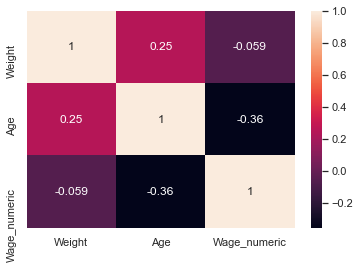

In [277]:
numerical_columns = data[['Weight', 'Age', 'Wage_numeric']]

sns.heatmap(numerical_columns.corr(), annot=True)bb
plt.show()

In [287]:
from collections import Counter
print(Counter(data['Nationality'].values))

Counter({'England': 1663, 'Germany': 1132, 'Spain': 1099, 'France': 970, 'Brazil': 830, 'Argentina': 755, 'Italy': 542, 'Netherlands': 467, 'Portugal': 357, 'United States': 352, 'Mexico': 332, 'Uruguay': 327, 'Colombia': 299, 'Japan': 295, 'Poland': 282, 'Scotland': 271, 'Republic of Ireland': 265, 'Belgium': 258, 'Norway': 255, 'Sweden': 252, 'Denmark': 248, 'Austria': 238, 'Turkey': 220, 'Switzerland': 203, 'Paraguay': 178, 'Chile': 177, 'Romania': 166, 'Korea Republic': 153, 'Australia': 143, 'Croatia': 140, 'Venezuela': 140, 'Senegal': 139, 'Peru': 138, 'Ecuador': 137, 'Nigeria': 136, 'Ghana': 133, 'China PR': 131, 'Wales': 128, 'Serbia': 126, 'Czech Republic': 118, 'Ivory Coast': 116, 'Russia': 111, 'Saudi Arabia': 102, 'Greece': 95, 'Cameroon': 94, 'Canada': 93, 'Morocco': 90, 'Northern Ireland': 75, 'Ukraine': 70, 'DR Congo': 68, 'Mali': 67, 'Bosnia Herzegovina': 67, 'Finland': 59, 'Bolivia': 59, 'Slovakia': 58, 'South Africa': 56, 'Slovenia': 53, 'Iceland': 49, 'Kosovo': 49, '

In [288]:
print(Counter(data['Nationality'].values).most_common(10))

[('England', 1663), ('Germany', 1132), ('Spain', 1099), ('France', 970), ('Brazil', 830), ('Argentina', 755), ('Italy', 542), ('Netherlands', 467), ('Portugal', 357), ('United States', 352)]


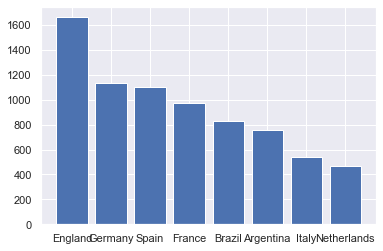

In [296]:
bar_plot = dict(Counter(data['Nationality'].values).most_common(8))
plt.bar(*zip(*bar_plot.items()))
plt.show()



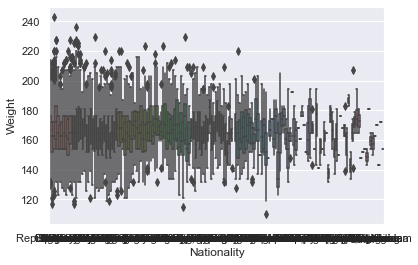

In [303]:
sns.boxplot(x= data['Nationality'], y = data['Weight'])
plt.show()